# 데이터 로딩

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

x= iris.data[:,2:] # 꽃잎의 길이와 넓이만 가져옴 (군집의 결과를 시각화하기 위해서)
y= iris.target # 각각의 클래스별로 색깔을 다르게 하기 위해서

# 최적의 k 찾기

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


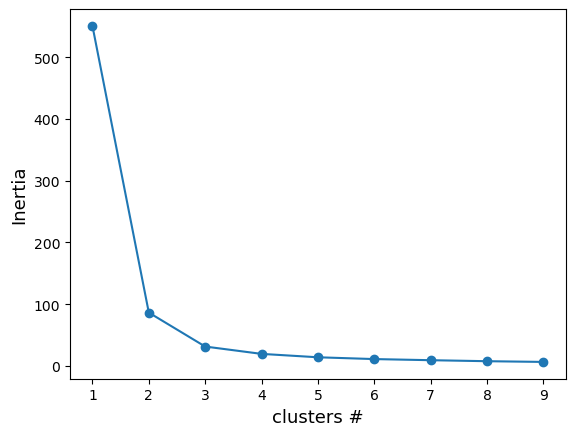

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 각 데이터에 할당된 클러스터의 중심까지의 제곱 거리의 합계를 저장
inertia_arr = []
k_range = range(1,10)

for k in k_range:
    kmeans = KMeans(n_clusters= k, random_state=20)#중심점고정
    kmeans.fit(x) #학습시키기
    inertia = kmeans.inertia_# 각 데이터에 할당된 클러스터의 중심까지의 제곱 거리의 합계
    inertia_arr.append(inertia)

plt.plot(k_range, inertia_arr, marker= 'o')
plt.xlabel('clusters #', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()

# K-means Clustering 하기

In [4]:
kmeans = KMeans(n_clusters=3, random_state=20)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=20)

In [5]:
y_hat = kmeans.labels_
print(y_hat)
print('cluster-0', len(y_hat[y_hat==0]))
print('cluster-1', len(y_hat[y_hat==1]))
print('cluster-2', len(y_hat[y_hat==2]))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]
cluster-0 52
cluster-1 48
cluster-2 50


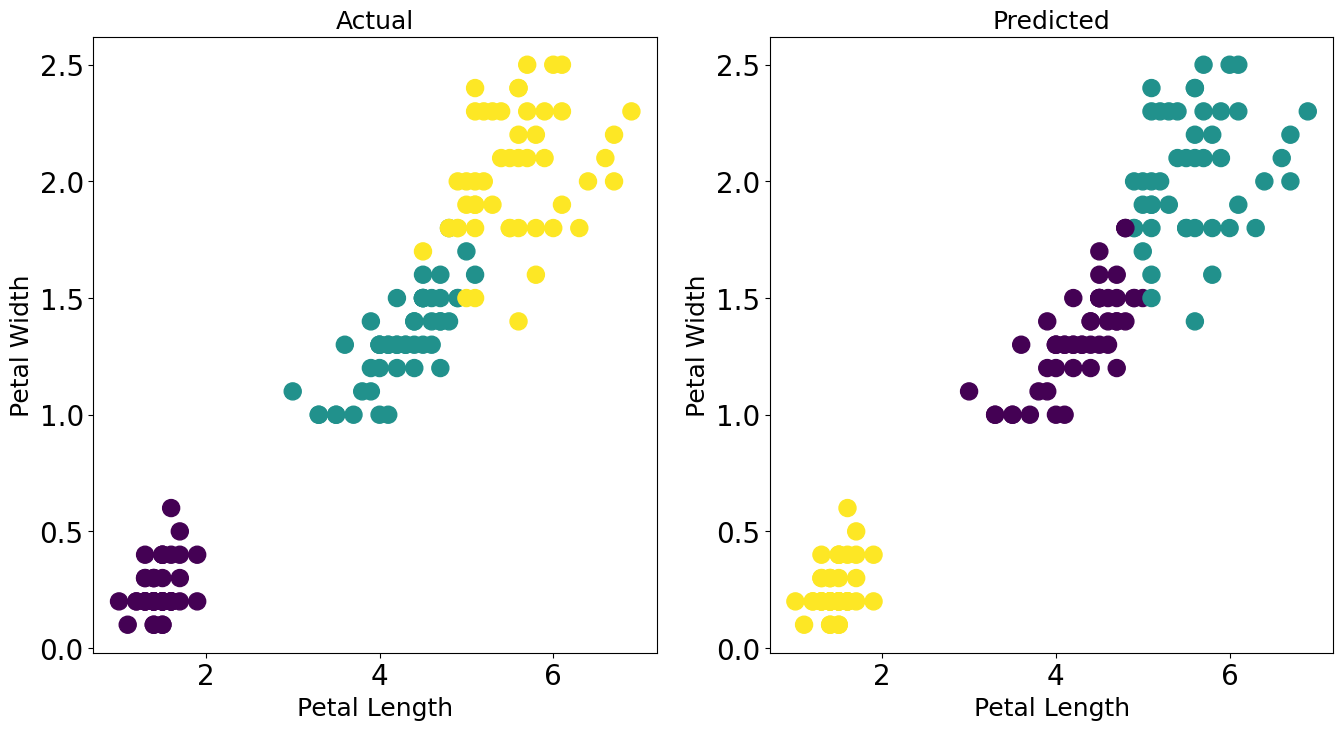

In [21]:
fig , axes = plt.subplots(1,2, figsize = (16,8)) # 1행 2열 . figsize = 가로로 긴 
# 정답 데이터에 관한 산점도
axes[0].scatter(x[:,0],x[:,1], c=y, s =150) #첫번째 열 , c== 색깔 y == 0,1,2, s==size
axes[0].set_xlabel('Petal Length', fontsize=18)
axes[0].set_ylabel('Petal Width', fontsize= 18)
axes[0].tick_params(labelsize=20) #눈금의 크기 조정
axes[0].set_title('Actual', fontsize= 18)

# K-Means Clustering을 통해 예측한 결과 산점도
axes[1].scatter(x[:,0],x[:,1], c=y_hat, s =150) #첫번째 열 , c== 색깔 y == 0,1,2, s==size
axes[1].set_xlabel('Petal Length', fontsize=18)
axes[1].set_ylabel('Petal Width', fontsize= 18)
axes[1].tick_params(labelsize=20) #눈금의 크기 조정
axes[1].set_title('Predicted', fontsize= 18)

plt.show()

차원 축소하는 기법!

# 군집 평가 _ 실루엣

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)

KMeans(n_clusters=3)

In [32]:
kmeans.inertia_

78.85144142614601

In [34]:
silhouette_score(iris.data, kmeans.labels_)

0.5528190123564095

In [9]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['cluster'] = kmeans.labels_

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [30]:

iris_df['silhouette coef'] = [ float('{0:.3f}'.format(x)) for x in silhouette_samples(iris.data, kmeans.labels_)]

In [31]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette coef
0,5.1,3.5,1.4,0.2,1,0.853
1,4.9,3.0,1.4,0.2,1,0.815
2,4.7,3.2,1.3,0.2,1,0.829
3,4.6,3.1,1.5,0.2,1,0.805
4,5.0,3.6,1.4,0.2,1,0.849


In [11]:
# iris의 모든 개별 데이터에 대한 실루엣 계수를 산출
score_samples = silhouette_samples(iris.data, kmeans.labels_)
iris_df['silhouette coef'] = score_samples
iris_df.head()

#apply.lamda(x: x.format('{x.2f}'))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette coef
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [12]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
#모든 데이터 평균 실루엣 계수 산출
average_score= silhouette_score(iris.data, kmeans.labels_)

In [14]:
group_by_cluster = iris_df.groupby('cluster')['silhouette coef'].mean()
print(group_by_cluster)

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette coef, dtype: float64


# 실루엣 계수를 이용한 군집 개수 최적화

In [15]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        clusterer.fit(X_features)
        cluster_labels = clusterer.labels_

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [16]:
for a in range(1,5):
    print(a)

1
2
3
4


In [ ]:
visualize_silhouette([2,3,4], iris.data )

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

In [ ]:
help(make_blobs)

In [ ]:
# make_blobs을 통해 clustering을 위한 4개의 클러스트 중심의 500개 2차원 데이터셋 생성
x,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, shuffle=True, random_state=1)

In [ ]:
np.bincount(y)

In [ ]:
visualize_silhouette([2,3,4,5], x)

In [ ]:
visualize_silhouette([2,3,4,5], iris.data)